In [ ]:
# Standard analytics packages
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
import sqlite3 as sql

# Import useful packages from sklearn
from sklearn.cluster import KMeans
from sklearn.ensemble import RandomForestClassifier, VotingClassifier
from sklearn.feature_selection import SelectKBest, f_classif
from sklearn.linear_model import LogisticRegression, LogisticRegressionCV
from sklearn.metrics import precision_score, recall_score
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.tree import DecisionTreeClassifier
from sklearn.impute import SimpleImputer as Imputer
from sklearn.linear_model import LinearRegression, LassoCV, RidgeCV
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score, roc_curve, auc, roc_auc_score
from xgboost import XGBClassifier
from xgboost import XGBRegressor
from sklearn.ensemble import GradientBoostingClassifier
from lightgbm import LGBMClassifier

#import stats library
import scipy.stats as stats

In [ ]:
df_wl = pd.read_csv("/content/drive/MyDrive/368 data csv files/team-w-l-att.csv")

# df4['W/L ratio'] = df4['wins']/df4['losses']

df_wl.head()

,Unnamed: 0,season,team,wins,losses,id,team_fifa_api_id,team_api_id,date,buildUpPlaySpeed,...,chanceCreationShooting,chanceCreationShootingClass,chanceCreationPositioningClass,defencePressure,defencePressureClass,defenceAggression,defenceAggressionClass,defenceTeamWidth,defenceTeamWidthClass,defenceDefenderLineClass
0,0,2008/2009,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1,2008/2009,1. FC Köln,11,17.0,425.0,31.0,8722.0,2015-09-10 00:00:00,59.0,...,71.0,Lots,Organised,42.0,Medium,56.0,Press,51.0,Normal,Cover
2,2,2008/2009,AC Bellinzona,11,15.0,160.0,1714.0,6493.0,2011-02-22 00:00:00,47.0,...,55.0,Normal,Organised,32.0,Deep,50.0,Press,56.0,Normal,Cover
3,3,2008/2009,ADO Den Haag,8,18.0,33.0,650.0,10217.0,2015-09-10 00:00:00,56.0,...,38.0,Normal,Organised,40.0,Medium,50.0,Press,52.0,Normal,Cover
4,4,2008/2009,AJ Auxerre,16,15.0,112.0,57.0,8583.0,2015-09-10 00:00:00,64.0,...,50.0,Normal,Organised,34.0,Medium,45.0,Press,40.0,Normal,Cover


In [ ]:
df_wl = df_wl.drop(df_wl.columns[0], axis = 1)
df_wl.head()

,season,team,wins,losses,id,team_fifa_api_id,team_api_id,date,buildUpPlaySpeed,buildUpPlaySpeedClass,...,chanceCreationShooting,chanceCreationShootingClass,chanceCreationPositioningClass,defencePressure,defencePressureClass,defenceAggression,defenceAggressionClass,defenceTeamWidth,defenceTeamWidthClass,defenceDefenderLineClass
0,2008/2009,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2008/2009,1. FC Köln,11,17.0,425.0,31.0,8722.0,2015-09-10 00:00:00,59.0,Balanced,...,71.0,Lots,Organised,42.0,Medium,56.0,Press,51.0,Normal,Cover
2,2008/2009,AC Bellinzona,11,15.0,160.0,1714.0,6493.0,2011-02-22 00:00:00,47.0,Balanced,...,55.0,Normal,Organised,32.0,Deep,50.0,Press,56.0,Normal,Cover
3,2008/2009,ADO Den Haag,8,18.0,33.0,650.0,10217.0,2015-09-10 00:00:00,56.0,Balanced,...,38.0,Normal,Organised,40.0,Medium,50.0,Press,52.0,Normal,Cover
4,2008/2009,AJ Auxerre,16,15.0,112.0,57.0,8583.0,2015-09-10 00:00:00,64.0,Balanced,...,50.0,Normal,Organised,34.0,Medium,45.0,Press,40.0,Normal,Cover


In [ ]:
df_wl = df_wl.drop([0])
df_wl.head()

,season,team,wins,losses,id,team_fifa_api_id,team_api_id,date,buildUpPlaySpeed,buildUpPlaySpeedClass,...,chanceCreationShooting,chanceCreationShootingClass,chanceCreationPositioningClass,defencePressure,defencePressureClass,defenceAggression,defenceAggressionClass,defenceTeamWidth,defenceTeamWidthClass,defenceDefenderLineClass
1,2008/2009,1. FC Köln,11,17.0,425.0,31.0,8722.0,2015-09-10 00:00:00,59.0,Balanced,...,71.0,Lots,Organised,42.0,Medium,56.0,Press,51.0,Normal,Cover
2,2008/2009,AC Bellinzona,11,15.0,160.0,1714.0,6493.0,2011-02-22 00:00:00,47.0,Balanced,...,55.0,Normal,Organised,32.0,Deep,50.0,Press,56.0,Normal,Cover
3,2008/2009,ADO Den Haag,8,18.0,33.0,650.0,10217.0,2015-09-10 00:00:00,56.0,Balanced,...,38.0,Normal,Organised,40.0,Medium,50.0,Press,52.0,Normal,Cover
4,2008/2009,AJ Auxerre,16,15.0,112.0,57.0,8583.0,2015-09-10 00:00:00,64.0,Balanced,...,50.0,Normal,Organised,34.0,Medium,45.0,Press,40.0,Normal,Cover
5,2008/2009,AS Monaco,11,15.0,841.0,69.0,9829.0,2015-09-10 00:00:00,52.0,Balanced,...,23.0,Little,Organised,56.0,Medium,62.0,Press,51.0,Normal,Cover


In [ ]:
df_wl.dtypes

season                             object
team                               object
wins                                int64
losses                            float64
id                                float64
team_fifa_api_id                  float64
team_api_id                       float64
date                               object
buildUpPlaySpeed                  float64
buildUpPlaySpeedClass              object
buildUpPlayDribbling              float64
buildUpPlayDribblingClass          object
buildUpPlayPassing                float64
buildUpPlayPassingClass            object
buildUpPlayPositioningClass        object
chanceCreationPassing             float64
chanceCreationPassingClass         object
chanceCreationCrossing            float64
chanceCreationCrossingClass        object
chanceCreationShooting            float64
chanceCreationShootingClass        object
chanceCreationPositioningClass     object
defencePressure                   float64
defencePressureClass              

In [ ]:
df_wl = df_wl.drop(['team_fifa_api_id', 'team_api_id', 'date', 'id'], axis = 1)

df_wl.head()

,season,team,wins,losses,buildUpPlaySpeed,buildUpPlaySpeedClass,buildUpPlayDribbling,buildUpPlayDribblingClass,buildUpPlayPassing,buildUpPlayPassingClass,...,chanceCreationShooting,chanceCreationShootingClass,chanceCreationPositioningClass,defencePressure,defencePressureClass,defenceAggression,defenceAggressionClass,defenceTeamWidth,defenceTeamWidthClass,defenceDefenderLineClass
1,2008/2009,1. FC Köln,11,17.0,59.0,Balanced,47.0,Normal,65.0,Mixed,...,71.0,Lots,Organised,42.0,Medium,56.0,Press,51.0,Normal,Cover
2,2008/2009,AC Bellinzona,11,15.0,47.0,Balanced,NaN,Little,54.0,Mixed,...,55.0,Normal,Organised,32.0,Deep,50.0,Press,56.0,Normal,Cover
3,2008/2009,ADO Den Haag,8,18.0,56.0,Balanced,40.0,Normal,66.0,Mixed,...,38.0,Normal,Organised,40.0,Medium,50.0,Press,52.0,Normal,Cover
4,2008/2009,AJ Auxerre,16,15.0,64.0,Balanced,55.0,Normal,49.0,Mixed,...,50.0,Normal,Organised,34.0,Medium,45.0,Press,40.0,Normal,Cover
5,2008/2009,AS Monaco,11,15.0,52.0,Balanced,42.0,Normal,43.0,Mixed,...,23.0,Little,Organised,56.0,Medium,62.0,Press,51.0,Normal,Cover


In [ ]:
df_wl.isnull().sum()

season                             0
team                               7
wins                               0
losses                            11
buildUpPlaySpeed                  22
buildUpPlaySpeedClass             22
buildUpPlayDribbling              94
buildUpPlayDribblingClass         22
buildUpPlayPassing                22
buildUpPlayPassingClass           22
buildUpPlayPositioningClass       22
chanceCreationPassing             22
chanceCreationPassingClass        22
chanceCreationCrossing            22
chanceCreationCrossingClass       22
chanceCreationShooting            22
chanceCreationShootingClass       22
chanceCreationPositioningClass    22
defencePressure                   22
defencePressureClass              22
defenceAggression                 22
defenceAggressionClass            22
defenceTeamWidth                  22
defenceTeamWidthClass             22
defenceDefenderLineClass          22
dtype: int64

In [ ]:
df_wl = df_wl.dropna(subset = ['team'])

df_wl.isnull().sum()

season                             0
team                               0
wins                               0
losses                             4
buildUpPlaySpeed                  15
buildUpPlaySpeedClass             15
buildUpPlayDribbling              87
buildUpPlayDribblingClass         15
buildUpPlayPassing                15
buildUpPlayPassingClass           15
buildUpPlayPositioningClass       15
chanceCreationPassing             15
chanceCreationPassingClass        15
chanceCreationCrossing            15
chanceCreationCrossingClass       15
chanceCreationShooting            15
chanceCreationShootingClass       15
chanceCreationPositioningClass    15
defencePressure                   15
defencePressureClass              15
defenceAggression                 15
defenceAggressionClass            15
defenceTeamWidth                  15
defenceTeamWidthClass             15
defenceDefenderLineClass          15
dtype: int64

In [ ]:
dfcolumns = df_wl.columns.tolist()

df_wl_columns_sorted = dfcolumns[:5] + dfcolumns[6:7] + dfcolumns[8:9] + dfcolumns[11:12] + dfcolumns[13:14] + dfcolumns[15:16] + dfcolumns[18:19] + dfcolumns[20:21] + dfcolumns[22:23] + dfcolumns[5:6] + dfcolumns[7:8] + dfcolumns[9:11] + dfcolumns[12:13] + dfcolumns[14:15] + dfcolumns[16:17] + dfcolumns[17:18] + dfcolumns[19:20] + dfcolumns[21:22] + dfcolumns[23:24] + dfcolumns[24:25]
df_wl = df_wl[df_wl_columns_sorted]

df_wl.head()

,season,team,wins,losses,buildUpPlaySpeed,buildUpPlayDribbling,buildUpPlayPassing,chanceCreationPassing,chanceCreationCrossing,chanceCreationShooting,...,buildUpPlayPassingClass,buildUpPlayPositioningClass,chanceCreationPassingClass,chanceCreationCrossingClass,chanceCreationShootingClass,chanceCreationPositioningClass,defencePressureClass,defenceAggressionClass,defenceTeamWidthClass,defenceDefenderLineClass
1,2008/2009,1. FC Köln,11,17.0,59.0,47.0,65.0,57.0,36.0,71.0,...,Mixed,Organised,Normal,Normal,Lots,Organised,Medium,Press,Normal,Cover
2,2008/2009,AC Bellinzona,11,15.0,47.0,NaN,54.0,55.0,38.0,55.0,...,Mixed,Organised,Normal,Normal,Normal,Organised,Deep,Press,Normal,Cover
3,2008/2009,ADO Den Haag,8,18.0,56.0,40.0,66.0,55.0,52.0,38.0,...,Mixed,Organised,Normal,Normal,Normal,Organised,Medium,Press,Normal,Cover
4,2008/2009,AJ Auxerre,16,15.0,64.0,55.0,49.0,51.0,63.0,50.0,...,Mixed,Organised,Normal,Normal,Normal,Organised,Medium,Press,Normal,Cover
5,2008/2009,AS Monaco,11,15.0,52.0,42.0,43.0,54.0,56.0,23.0,...,Mixed,Organised,Normal,Normal,Little,Organised,Medium,Press,Normal,Cover


In [ ]:
df_wl_columns_sorted

['season',
 'team',
 'wins',
 'losses',
 'buildUpPlaySpeed',
 'buildUpPlayDribbling',
 'buildUpPlayPassing',
 'chanceCreationPassing',
 'chanceCreationCrossing',
 'chanceCreationShooting',
 'defencePressure',
 'defenceAggression',
 'defenceTeamWidth',
 'buildUpPlaySpeedClass',
 'buildUpPlayDribblingClass',
 'buildUpPlayPassingClass',
 'buildUpPlayPositioningClass',
 'chanceCreationPassingClass',
 'chanceCreationCrossingClass',
 'chanceCreationShootingClass',
 'chanceCreationPositioningClass',
 'defencePressureClass',
 'defenceAggressionClass',
 'defenceTeamWidthClass',
 'defenceDefenderLineClass']

In [ ]:
df_wl_mod = pd.get_dummies(df_wl, columns = df_wl.columns[13:])
df_wl_mod.head()

,season,team,wins,losses,buildUpPlaySpeed,buildUpPlayDribbling,buildUpPlayPassing,chanceCreationPassing,chanceCreationCrossing,chanceCreationShooting,...,defencePressureClass_High,defencePressureClass_Medium,defenceAggressionClass_Contain,defenceAggressionClass_Double,defenceAggressionClass_Press,defenceTeamWidthClass_Narrow,defenceTeamWidthClass_Normal,defenceTeamWidthClass_Wide,defenceDefenderLineClass_Cover,defenceDefenderLineClass_Offside Trap
1,2008/2009,1. FC Köln,11,17.0,59.0,47.0,65.0,57.0,36.0,71.0,...,0,1,0,0,1,0,1,0,1,0
2,2008/2009,AC Bellinzona,11,15.0,47.0,NaN,54.0,55.0,38.0,55.0,...,0,0,0,0,1,0,1,0,1,0
3,2008/2009,ADO Den Haag,8,18.0,56.0,40.0,66.0,55.0,52.0,38.0,...,0,1,0,0,1,0,1,0,1,0
4,2008/2009,AJ Auxerre,16,15.0,64.0,55.0,49.0,51.0,63.0,50.0,...,0,1,0,0,1,0,1,0,1,0
5,2008/2009,AS Monaco,11,15.0,52.0,42.0,43.0,54.0,56.0,23.0,...,0,1,0,0,1,0,1,0,1,0


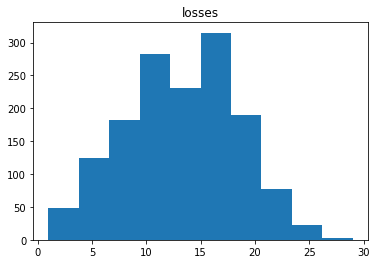

False    1474
True        4
Name: losses, dtype: int64


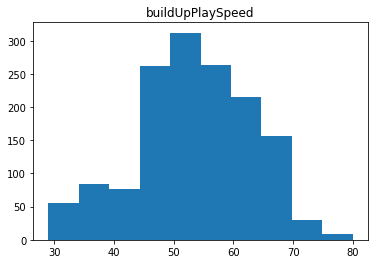

False    1463
True       15
Name: buildUpPlaySpeed, dtype: int64


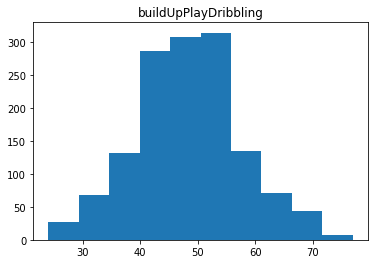

False    1391
True       87
Name: buildUpPlayDribbling, dtype: int64


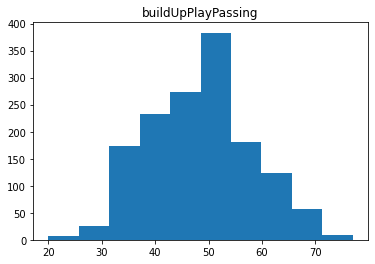

False    1463
True       15
Name: buildUpPlayPassing, dtype: int64


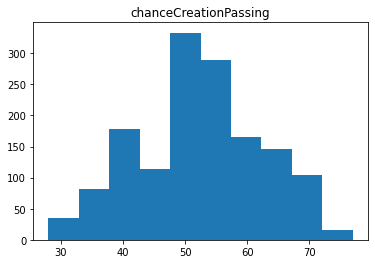

False    1463
True       15
Name: chanceCreationPassing, dtype: int64


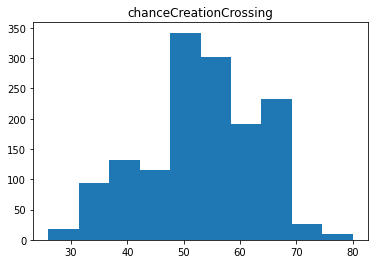

False    1463
True       15
Name: chanceCreationCrossing, dtype: int64


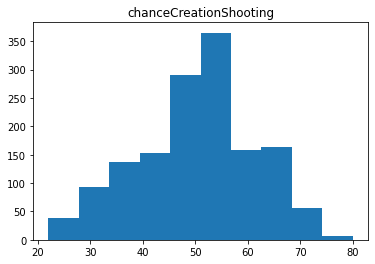

False    1463
True       15
Name: chanceCreationShooting, dtype: int64


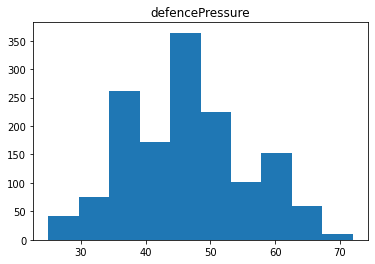

False    1463
True       15
Name: defencePressure, dtype: int64


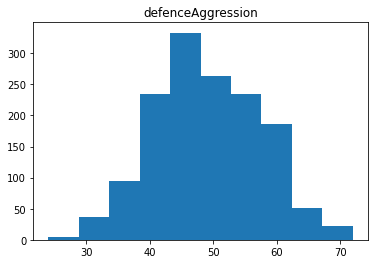

False    1463
True       15
Name: defenceAggression, dtype: int64


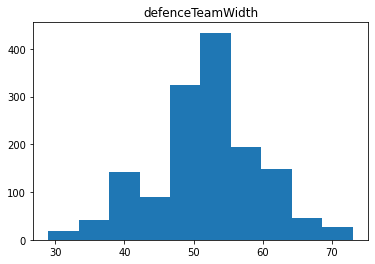

False    1463
True       15
Name: defenceTeamWidth, dtype: int64


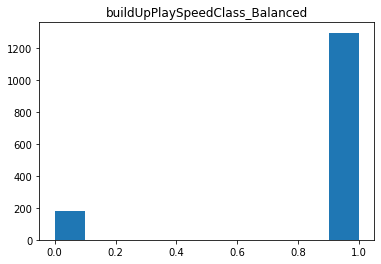

False    1478
Name: buildUpPlaySpeedClass_Balanced, dtype: int64


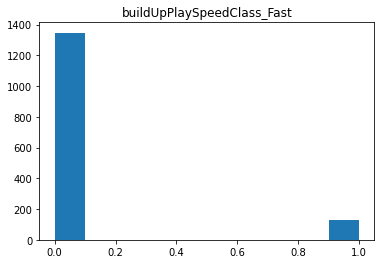

False    1478
Name: buildUpPlaySpeedClass_Fast, dtype: int64


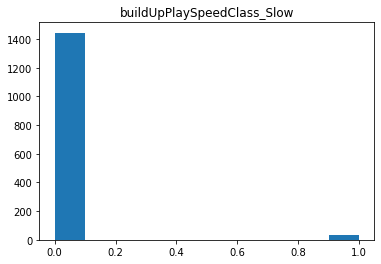

False    1478
Name: buildUpPlaySpeedClass_Slow, dtype: int64


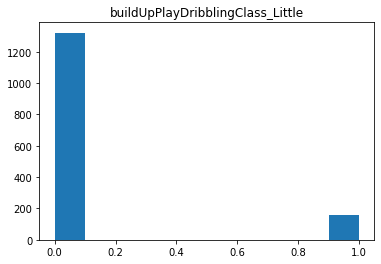

False    1478
Name: buildUpPlayDribblingClass_Little, dtype: int64


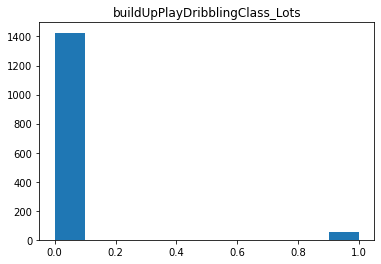

False    1478
Name: buildUpPlayDribblingClass_Lots, dtype: int64


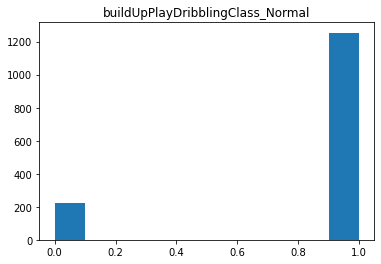

False    1478
Name: buildUpPlayDribblingClass_Normal, dtype: int64


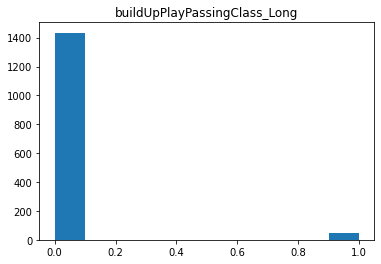

False    1478
Name: buildUpPlayPassingClass_Long, dtype: int64


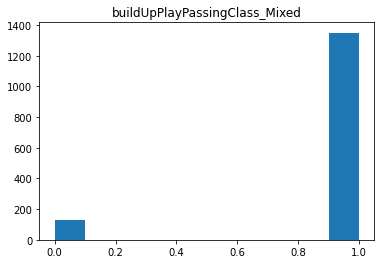

False    1478
Name: buildUpPlayPassingClass_Mixed, dtype: int64


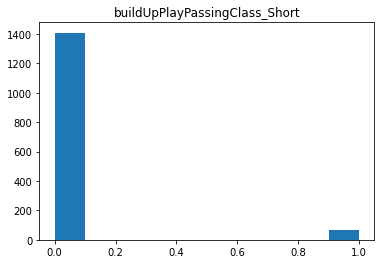

False    1478
Name: buildUpPlayPassingClass_Short, dtype: int64


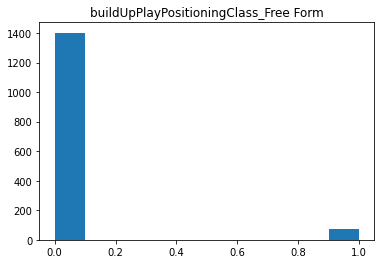

False    1478
Name: buildUpPlayPositioningClass_Free Form, dtype: int64


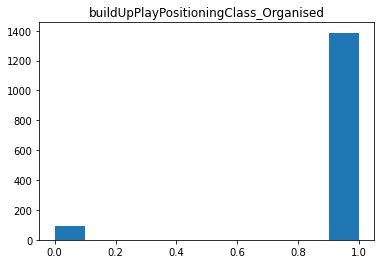

False    1478
Name: buildUpPlayPositioningClass_Organised, dtype: int64


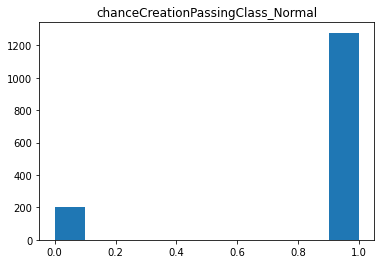

False    1478
Name: chanceCreationPassingClass_Normal, dtype: int64


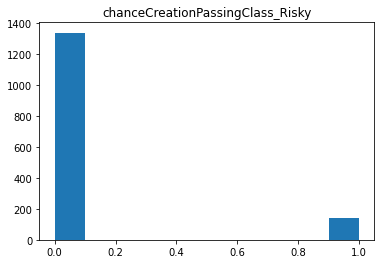

False    1478
Name: chanceCreationPassingClass_Risky, dtype: int64


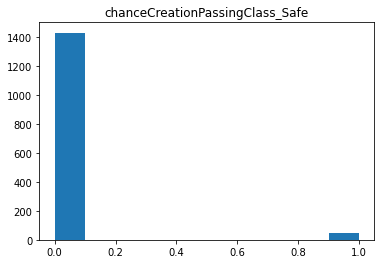

False    1478
Name: chanceCreationPassingClass_Safe, dtype: int64


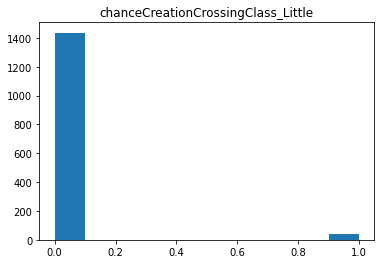

False    1478
Name: chanceCreationCrossingClass_Little, dtype: int64


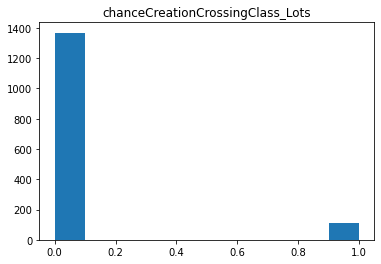

False    1478
Name: chanceCreationCrossingClass_Lots, dtype: int64


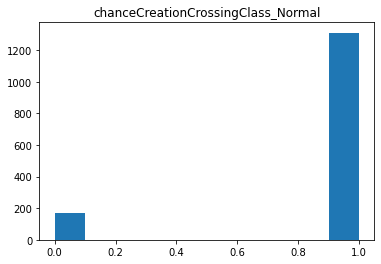

False    1478
Name: chanceCreationCrossingClass_Normal, dtype: int64


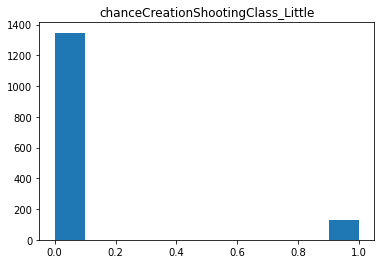

False    1478
Name: chanceCreationShootingClass_Little, dtype: int64


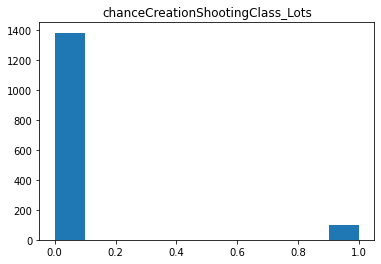

False    1478
Name: chanceCreationShootingClass_Lots, dtype: int64


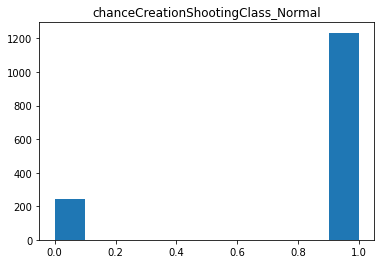

False    1478
Name: chanceCreationShootingClass_Normal, dtype: int64


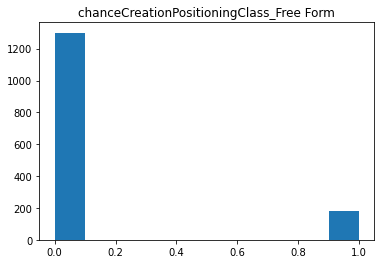

False    1478
Name: chanceCreationPositioningClass_Free Form, dtype: int64


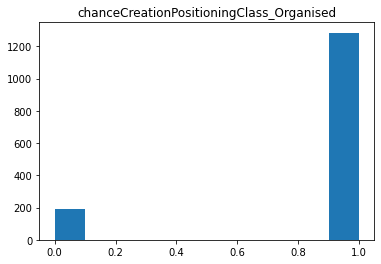

False    1478
Name: chanceCreationPositioningClass_Organised, dtype: int64


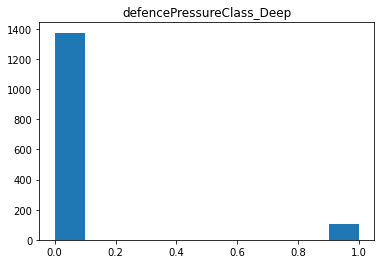

False    1478
Name: defencePressureClass_Deep, dtype: int64


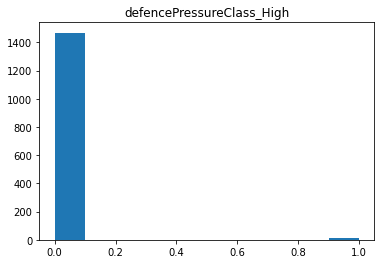

False    1478
Name: defencePressureClass_High, dtype: int64


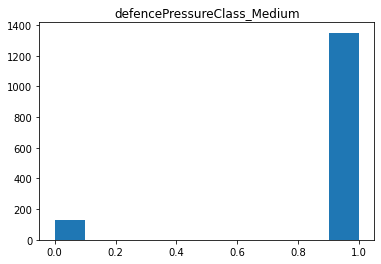

False    1478
Name: defencePressureClass_Medium, dtype: int64


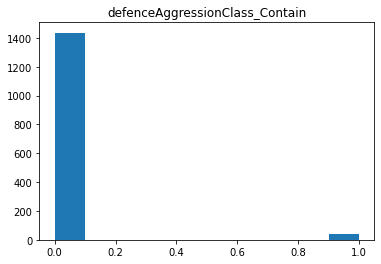

False    1478
Name: defenceAggressionClass_Contain, dtype: int64


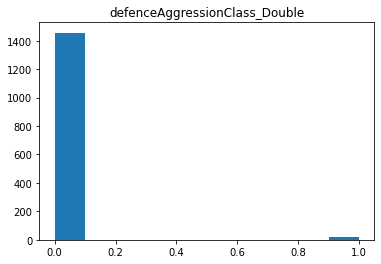

False    1478
Name: defenceAggressionClass_Double, dtype: int64


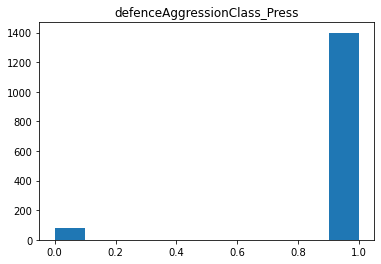

False    1478
Name: defenceAggressionClass_Press, dtype: int64


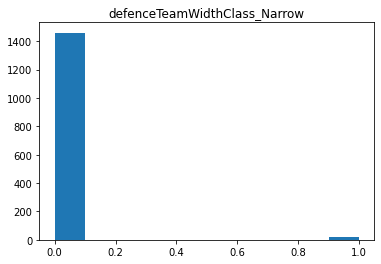

False    1478
Name: defenceTeamWidthClass_Narrow, dtype: int64


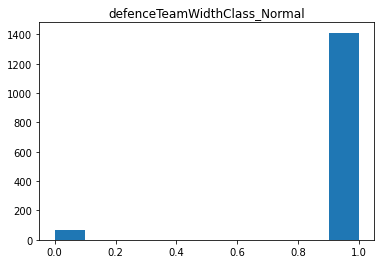

False    1478
Name: defenceTeamWidthClass_Normal, dtype: int64


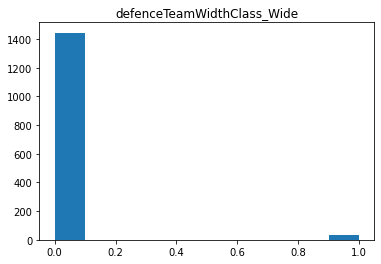

False    1478
Name: defenceTeamWidthClass_Wide, dtype: int64


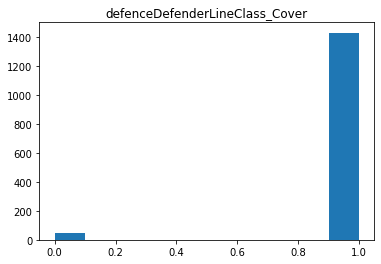

False    1478
Name: defenceDefenderLineClass_Cover, dtype: int64


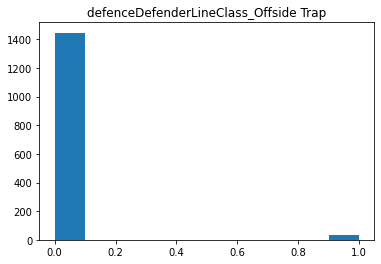

False    1478
Name: defenceDefenderLineClass_Offside Trap, dtype: int64


In [ ]:
X = df_wl_mod.drop(['wins', 'team', 'season'], axis = 1)
y = df_wl_mod['wins']

for feat in X.columns:
    print("=================")
    plt.title(feat)
    plt.hist(X[feat])
    plt.show()
    print(pd.isna(X[feat]).value_counts())
    

In [ ]:
df_wl_mod.dtypes

season                                       object
team                                         object
wins                                          int64
losses                                      float64
buildUpPlaySpeed                            float64
buildUpPlayDribbling                        float64
buildUpPlayPassing                          float64
chanceCreationPassing                       float64
chanceCreationCrossing                      float64
chanceCreationShooting                      float64
defencePressure                             float64
defenceAggression                           float64
defenceTeamWidth                            float64
buildUpPlaySpeedClass_Balanced                uint8
buildUpPlaySpeedClass_Fast                    uint8
buildUpPlaySpeedClass_Slow                    uint8
buildUpPlayDribblingClass_Little              uint8
buildUpPlayDribblingClass_Lots                uint8
buildUpPlayDribblingClass_Normal              uint8
buildUpPlayP

In [ ]:
df_wl_mod.isnull().sum()

season                                       0
team                                         0
wins                                         0
losses                                       4
buildUpPlaySpeed                            15
buildUpPlayDribbling                        87
buildUpPlayPassing                          15
chanceCreationPassing                       15
chanceCreationCrossing                      15
chanceCreationShooting                      15
defencePressure                             15
defenceAggression                           15
defenceTeamWidth                            15
buildUpPlaySpeedClass_Balanced               0
buildUpPlaySpeedClass_Fast                   0
buildUpPlaySpeedClass_Slow                   0
buildUpPlayDribblingClass_Little             0
buildUpPlayDribblingClass_Lots               0
buildUpPlayDribblingClass_Normal             0
buildUpPlayPassingClass_Long                 0
buildUpPlayPassingClass_Mixed                0
buildUpPlayPa

In [ ]:
imp_median = Imputer(strategy = 'median')
imp_mode = Imputer(strategy = 'most_frequent')

imp_median.fit(df_wl_mod[['losses']])
imp_mode.fit(df_wl_mod[['buildUpPlaySpeed', 'buildUpPlayDribbling', 'buildUpPlayPassing', 'chanceCreationPassing', 'chanceCreationCrossing', 'chanceCreationShooting', 'defencePressure', 'defenceAggression', 'defenceTeamWidth']])

df_wl_mod_imp = df_wl_mod.copy()

df_wl_mod_imp[['losses']] = imp_median.transform(df_wl_mod_imp[['losses']])
df_wl_mod_imp[['buildUpPlaySpeed', 'buildUpPlayDribbling', 'buildUpPlayPassing', 'chanceCreationPassing', 'chanceCreationCrossing', 'chanceCreationShooting', 'defencePressure', 'defenceAggression', 'defenceTeamWidth']] = imp_mode.transform(df_wl_mod_imp[['buildUpPlaySpeed', 'buildUpPlayDribbling', 'buildUpPlayPassing', 'chanceCreationPassing', 'chanceCreationCrossing', 'chanceCreationShooting', 'defencePressure', 'defenceAggression', 'defenceTeamWidth']])

df_wl_mod_imp.isnull().sum()

season                                      0
team                                        0
wins                                        0
losses                                      0
buildUpPlaySpeed                            0
buildUpPlayDribbling                        0
buildUpPlayPassing                          0
chanceCreationPassing                       0
chanceCreationCrossing                      0
chanceCreationShooting                      0
defencePressure                             0
defenceAggression                           0
defenceTeamWidth                            0
buildUpPlaySpeedClass_Balanced              0
buildUpPlaySpeedClass_Fast                  0
buildUpPlaySpeedClass_Slow                  0
buildUpPlayDribblingClass_Little            0
buildUpPlayDribblingClass_Lots              0
buildUpPlayDribblingClass_Normal            0
buildUpPlayPassingClass_Long                0
buildUpPlayPassingClass_Mixed               0
buildUpPlayPassingClass_Short     

In [ ]:
df_wl_mod_imp['season'].value_counts()

2014/2015    188
2015/2016    188
2008/2009    187
2012/2013    186
2009/2010    185
2010/2011    185
2011/2012    185
2013/2014    174
Name: season, dtype: int64

In [ ]:
season_mapping = {'season':  {'2014/2015': 2015, '2015/2016': 2016, '2008/2009': 2009, '2012/2013': 2013, '2009/2010': 2010, '2010/2011': 2011, '2011/2012': 2012, '2013/2014': 2014}}

df_wl_mod_imp = df_wl_mod_imp.replace(season_mapping)
df_wl_mod = df_wl_mod.replace(season_mapping)

df_wl_mod_imp.head()

,season,team,wins,losses,buildUpPlaySpeed,buildUpPlayDribbling,buildUpPlayPassing,chanceCreationPassing,chanceCreationCrossing,chanceCreationShooting,...,defencePressureClass_High,defencePressureClass_Medium,defenceAggressionClass_Contain,defenceAggressionClass_Double,defenceAggressionClass_Press,defenceTeamWidthClass_Narrow,defenceTeamWidthClass_Normal,defenceTeamWidthClass_Wide,defenceDefenderLineClass_Cover,defenceDefenderLineClass_Offside Trap
1,2009,1. FC Köln,11,17.0,59.0,47.0,65.0,57.0,36.0,71.0,...,0,1,0,0,1,0,1,0,1,0
2,2009,AC Bellinzona,11,15.0,47.0,49.0,54.0,55.0,38.0,55.0,...,0,0,0,0,1,0,1,0,1,0
3,2009,ADO Den Haag,8,18.0,56.0,40.0,66.0,55.0,52.0,38.0,...,0,1,0,0,1,0,1,0,1,0
4,2009,AJ Auxerre,16,15.0,64.0,55.0,49.0,51.0,63.0,50.0,...,0,1,0,0,1,0,1,0,1,0
5,2009,AS Monaco,11,15.0,52.0,42.0,43.0,54.0,56.0,23.0,...,0,1,0,0,1,0,1,0,1,0


In [ ]:
df_wl_mod.head()

,season,team,wins,losses,buildUpPlaySpeed,buildUpPlayDribbling,buildUpPlayPassing,chanceCreationPassing,chanceCreationCrossing,chanceCreationShooting,...,defencePressureClass_High,defencePressureClass_Medium,defenceAggressionClass_Contain,defenceAggressionClass_Double,defenceAggressionClass_Press,defenceTeamWidthClass_Narrow,defenceTeamWidthClass_Normal,defenceTeamWidthClass_Wide,defenceDefenderLineClass_Cover,defenceDefenderLineClass_Offside Trap
1,2009,1. FC Köln,11,17.0,59.0,47.0,65.0,57.0,36.0,71.0,...,0,1,0,0,1,0,1,0,1,0
2,2009,AC Bellinzona,11,15.0,47.0,NaN,54.0,55.0,38.0,55.0,...,0,0,0,0,1,0,1,0,1,0
3,2009,ADO Den Haag,8,18.0,56.0,40.0,66.0,55.0,52.0,38.0,...,0,1,0,0,1,0,1,0,1,0
4,2009,AJ Auxerre,16,15.0,64.0,55.0,49.0,51.0,63.0,50.0,...,0,1,0,0,1,0,1,0,1,0
5,2009,AS Monaco,11,15.0,52.0,42.0,43.0,54.0,56.0,23.0,...,0,1,0,0,1,0,1,0,1,0


In [ ]:
X_train_logreg, X_test_logreg, y_train_logreg, y_test_logreg = train_test_split(df_wl_mod_imp.drop(columns=['season', 'wins', 'team']),
                                                    df_wl_mod_imp.wins,
                                                    test_size = 0.3,
                                                    random_state = 2000)

In [ ]:
logreg = LogisticRegression(max_iter=10000, solver='liblinear')

logreg.fit(X_train_logreg, y_train_logreg)

y_test_pred_logreg = logreg.predict(X_test_logreg)

In [ ]:
train_score = logreg.score(X_train_logreg, y_train_logreg)
test_score = logreg.score(X_test_logreg, y_test_logreg)

print(f'Train score {train_score:.3}         Test Score {test_score:.3}')

Train score 0.238         Test Score 0.0878


In [ ]:
df_train = df_wl_mod[df_wl_mod.season<2012]
df_test = df_wl_mod[df_wl_mod.season>=2012]

X_train = df_train.drop(['wins', 'team', 'losses'], axis = 1)
y_train = df_train.wins

X_test = df_test.drop(['wins', 'team', 'losses'], axis = 1)
y_test = df_test.wins

In [ ]:
mdl_xgbc = XGBClassifier(base_score=0.5, booster='gbtree',
              colsample_bylevel = 1, colsample_bynode = 1, colsample_bytree = 0.5,
              grow_policy = 'depthwise', learning_rate = 0.01, max_bin = 256,
              max_depth = 7, max_leaves = 0, min_child_weight = 8, n_estimators = 900,
              num_parallel_tree = 1, random_state=0, gpu_id = 0, reg_lambda = 2, reg_alpha = 0.2)

mdl_xgbc.fit(X_train, y_train)

XGBClassifier(colsample_bytree=0.5, gpu_id=0, grow_policy='depthwise',
              learning_rate=0.01, max_bin=256, max_depth=7, max_leaves=0,
              min_child_weight=8, n_estimators=900, num_parallel_tree=1,
              objective='multi:softprob', reg_alpha=0.2, reg_lambda=2)

In [ ]:
y_test_pred_xgboost = mdl_xgbc.predict(X_test)

In [ ]:
train_score_xgbc = mdl_xgbc.score(X_train, y_train)
test_score_xgbc = mdl_xgbc.score(X_test, y_test)

print(f'Train score {train_score_xgbc:.3}         Test Score {test_score_xgbc:.3}')

Train score 0.429         Test Score 0.0847


In [ ]:
mdl_xgbr = XGBRegressor(objective = 'reg:squarederror', n_estimators=1000)
mdl_xgbr.fit(X_train, y_train)
y_test_pred_xg = mdl_xgbr.predict(X_test)

In [ ]:
pred = y_test_pred_xg
pred = np.round(pred, 0)
pred

array([14., 13., 12., 15.,  6., 13., 12., 13., 11., 17., 11.,  9., 22.,
       20., 14., 11., 16., 16., 17., 19.,  7., 11., 10., 11., 23., 10.,
       13., 11.,  9., 12., 12., 26., 11., 22., 12., 16.,  8.,  9., 11.,
       16.,  4., 15., 10., 14., 30., 23., 19., 16., 14., 12., 13.,  9.,
       21., 13., 14., 14., 12., 22., 12., 19., 16., 12., 13., 11., 11.,
       14., 13., 18., 15., 12., 12., 13., 16., 16., 14.,  6., 11., 23.,
       13., 14., 16., 16., 18., 11., 11., 12., 10., 11., 10., 21., 20.,
        9., 15., 11., 15., 12.,  4., 16., 20., 25., 23., 14., 13., 13.,
       10., 12., 20., 10.,  9.,  9., 10., 11., 17., 18., 11., 11., 20.,
       18., 14., 12., 19., 17., 10.,  4., 14., 14.,  5., 19., 11., 28.,
       16., 10., 29., 15., 10., 11.,  9., 13., 20., 11.,  6.,  7., 14.,
       13., 10., 20., 11., 11.,  8.,  4., 18.,  9.,  8., 14., 12., 12.,
        9., 11., 15., 15., 12., 11., 16., 11., 17., 13., 18.,  9.,  6.,
       21., 11., 12., 10., 18.,  8., 12.,  7., 11., 11.,  9., 17

In [ ]:
train_score_xgbr = mdl_xgbr.score(X_train, y_train)
test_score_xgbr = mdl_xgbr.score(X_test, y_test)

print(f'Train score {train_score_xgbr:.3}         Test Score {train_score_xgbr:.3}')

Train score 0.922         Test Score 0.922


In [ ]:
!unzip '/content/drive/MyDrive/archive.zip'

Archive:  /content/drive/MyDrive/archive.zip
  inflating: database.sqlite         


In [ ]:
cnx = sql.connect('/content/database.sqlite')
df_year = pd.read_sql_query("select cast(substr(season,1,4) as text) from match", cnx)
df_year.head()


,"cast(substr(season,1,4) as text)"
0,2008
1,2008
2,2008
3,2008
4,2008


In [ ]:
QUERY1 = '''
SELECT 
substr(season,1,4)  as 'yr',
home_team_api_id,
away_team_api_id,
case
  when home_team_goal > away_team_goal then 1 
    else 0
END AS  home_win,
 
p1.overall_rating as ratingp1

FROM match m 
 
left join
(select  cast(strftime("%Y",date) as TEXT) as  yr, player_api_id, overall_rating from player_attributes ) as p1
on substr(m.season,1,4) = p1.yr and m.home_player_1 = p1.player_api_id

'''

df1 = pd.read_sql_query(QUERY1, cnx)

QUERY2 = '''
SELECT 
substr(season,1,4)  as 'yr',
home_team_api_id,
away_team_api_id,
case
  when home_team_goal > away_team_goal then 1 
    else 0
END AS  home_win,
 
p2.overall_rating as ratingp2

FROM match m 
 
left join
(select  cast(strftime("%Y",date) as TEXT) as  yr, player_api_id, overall_rating from player_attributes ) as p2
on substr(m.season,1,4) = p2.yr and m.home_player_2 = p2.player_api_id

'''

df2 = pd.read_sql_query(QUERY2, cnx)

QUERY3 = '''
SELECT 
substr(season,1,4)  as 'yr',
home_team_api_id,
away_team_api_id,
case
  when home_team_goal > away_team_goal then 1 
    else 0
END AS  home_win,
 
p3.overall_rating as ratingp3

FROM match m 
 
left join
(select  cast(strftime("%Y",date) as TEXT) as  yr, player_api_id, overall_rating from player_attributes ) as p3
on substr(m.season,1,4) = p3.yr and m.home_player_3 = p3.player_api_id

'''

df3 = pd.read_sql_query(QUERY3, cnx)

QUERY4 = '''
SELECT 
substr(season,1,4)  as 'yr',
home_team_api_id,
away_team_api_id,
case
  when home_team_goal > away_team_goal then 1 
    else 0
END AS  home_win,
 
p4.overall_rating as ratingp4

FROM match m 
 
left join
(select  cast(strftime("%Y",date) as TEXT) as  yr, player_api_id, overall_rating from player_attributes ) as p4
on substr(m.season,1,4) = p4.yr and m.home_player_4 = p4.player_api_id

'''

df4 = pd.read_sql_query(QUERY4, cnx)

QUERY5 = '''
SELECT 
substr(season,1,4)  as 'yr',
home_team_api_id,
away_team_api_id,
case
  when home_team_goal > away_team_goal then 1 
    else 0
END AS  home_win,
 
p5.overall_rating as ratingp5

FROM match m 
 
left join
(select  cast(strftime("%Y",date) as TEXT) as  yr, player_api_id, overall_rating from player_attributes ) as p5
on substr(m.season,1,4) = p5.yr and m.home_player_5 = p5.player_api_id

'''

df5 = pd.read_sql_query(QUERY5, cnx)

QUERY6 = '''
SELECT 
substr(season,1,4)  as 'yr',
home_team_api_id,
away_team_api_id,
case
  when home_team_goal > away_team_goal then 1 
    else 0
END AS  home_win,
 
p6.overall_rating as ratingp6

FROM match m 
 
left join
(select  cast(strftime("%Y",date) as TEXT) as  yr, player_api_id, overall_rating from player_attributes ) as p6
on substr(m.season,1,4) = p6.yr and m.home_player_6 = p6.player_api_id

'''

df6 = pd.read_sql_query(QUERY6, cnx)

QUERY7 = '''
SELECT 
substr(season,1,4)  as 'yr',
home_team_api_id,
away_team_api_id,
case
  when home_team_goal > away_team_goal then 1 
    else 0
END AS  home_win,
 
p7.overall_rating as ratingp7

FROM match m 
 
left join
(select  cast(strftime("%Y",date) as TEXT) as  yr, player_api_id, overall_rating from player_attributes ) as p7
on substr(m.season,1,4) = p7.yr and m.home_player_7 = p7.player_api_id

'''

df7 = pd.read_sql_query(QUERY7, cnx)

QUERY8 = '''
SELECT 
substr(season,1,4)  as 'yr',
home_team_api_id,
away_team_api_id,
case
  when home_team_goal > away_team_goal then 1 
    else 0
END AS  home_win,
 
p8.overall_rating as ratingp8

FROM match m 
 
left join
(select  cast(strftime("%Y",date) as TEXT) as  yr, player_api_id, overall_rating from player_attributes ) as p8
on substr(m.season,1,4) = p8.yr and m.home_player_8 = p8.player_api_id

'''

df8 = pd.read_sql_query(QUERY8, cnx)

QUERY9 = '''
SELECT 
substr(season,1,4)  as 'yr',
home_team_api_id,
away_team_api_id,
case
  when home_team_goal > away_team_goal then 1 
    else 0
END AS  home_win,
 
p9.overall_rating as ratingp9

FROM match m 
 
left join
(select  cast(strftime("%Y",date) as TEXT) as  yr, player_api_id, overall_rating from player_attributes ) as p9
on substr(m.season,1,4) = p9.yr and m.home_player_9 = p9.player_api_id

'''

df9 = pd.read_sql_query(QUERY9, cnx)

QUERY10 = '''
SELECT 
substr(season,1,4)  as 'yr',
home_team_api_id,
away_team_api_id,
case
  when home_team_goal > away_team_goal then 1 
    else 0
END AS  home_win,
 
p10.overall_rating as ratingp10

FROM match m 
 
left join
(select  cast(strftime("%Y",date) as TEXT) as  yr, player_api_id, overall_rating from player_attributes ) as p10
on substr(m.season,1,4) = p10.yr and m.home_player_10 = p10.player_api_id

'''

df10 = pd.read_sql_query(QUERY10, cnx)

QUERY11 = '''
SELECT 
substr(season,1,4)  as 'yr',
home_team_api_id,
away_team_api_id,
case
  when home_team_goal > away_team_goal then 1 
    else 0
END AS  home_win,
 
p11.overall_rating as ratingp11

FROM match m 
 
left join
(select  cast(strftime("%Y",date) as TEXT) as  yr, player_api_id, overall_rating from player_attributes ) as p11
on substr(m.season,1,4) = p11.yr and m.home_player_11 = p11.player_api_id

'''

df11 = pd.read_sql_query(QUERY11, cnx)

QUERY12 = '''
SELECT 
substr(season,1,4)  as 'yr',
home_team_api_id,
away_team_api_id,
case
  when home_team_goal > away_team_goal then 1 
    else 0
END AS  home_win,
 
p12.overall_rating as ratingp12

FROM match m 
 
left join
(select  cast(strftime("%Y",date) as TEXT) as  yr, player_api_id, overall_rating from player_attributes ) as p12
on substr(m.season,1,4) = p12.yr and m.away_player_1 = p12.player_api_id

'''

df12 = pd.read_sql_query(QUERY12, cnx)

QUERY13 = '''
SELECT 
substr(season,1,4)  as 'yr',
home_team_api_id,
away_team_api_id,
case
  when home_team_goal > away_team_goal then 1 
    else 0
END AS  home_win,
 
p13.overall_rating as ratingp13

FROM match m 
 
left join
(select  cast(strftime("%Y",date) as TEXT) as  yr, player_api_id, overall_rating from player_attributes ) as p13
on substr(m.season,1,4) = p13.yr and m.away_player_2 = p13.player_api_id

'''

df13 = pd.read_sql_query(QUERY13, cnx)

QUERY14 = '''
SELECT 
substr(season,1,4)  as 'yr',
home_team_api_id,
away_team_api_id,
case
  when home_team_goal > away_team_goal then 1 
    else 0
END AS  home_win,
 
p14.overall_rating as ratingp14

FROM match m 
 
left join
(select  cast(strftime("%Y",date) as TEXT) as  yr, player_api_id, overall_rating from player_attributes ) as p14
on substr(m.season,1,4) = p14.yr and m.away_player_3 = p14.player_api_id

'''

df14 = pd.read_sql_query(QUERY14, cnx)

QUERY15 = '''
SELECT 
substr(season,1,4)  as 'yr',
home_team_api_id,
away_team_api_id,
case
  when home_team_goal > away_team_goal then 1 
    else 0
END AS  home_win,
 
p15.overall_rating as ratingp15

FROM match m 
 
left join
(select  cast(strftime("%Y",date) as TEXT) as  yr, player_api_id, overall_rating from player_attributes ) as p15
on substr(m.season,1,4) = p15.yr and m.away_player_4 = p15.player_api_id

'''

df15 = pd.read_sql_query(QUERY15, cnx)

QUERY16 = '''
SELECT 
substr(season,1,4)  as 'yr',
home_team_api_id,
away_team_api_id,
case
  when home_team_goal > away_team_goal then 1 
    else 0
END AS  home_win,
 
p16.overall_rating as ratingp16

FROM match m 
 
left join
(select  cast(strftime("%Y",date) as TEXT) as  yr, player_api_id, overall_rating from player_attributes ) as p16
on substr(m.season,1,4) = p16.yr and m.away_player_5 = p16.player_api_id

'''

df16 = pd.read_sql_query(QUERY16, cnx)

QUERY17 = '''
SELECT 
substr(season,1,4)  as 'yr',
home_team_api_id,
away_team_api_id,
case
  when home_team_goal > away_team_goal then 1 
    else 0
END AS  home_win,
 
p17.overall_rating as ratingp17

FROM match m 
 
left join
(select  cast(strftime("%Y",date) as TEXT) as  yr, player_api_id, overall_rating from player_attributes ) as p17
on substr(m.season,1,4) = p17.yr and m.away_player_6 = p17.player_api_id

'''

df17 = pd.read_sql_query(QUERY17, cnx)

QUERY18 = '''
SELECT 
substr(season,1,4)  as 'yr',
home_team_api_id,
away_team_api_id,
case
  when home_team_goal > away_team_goal then 1 
    else 0
END AS  home_win,
 
p18.overall_rating as ratingp18

FROM match m 
 
left join
(select  cast(strftime("%Y",date) as TEXT) as  yr, player_api_id, overall_rating from player_attributes ) as p18
on substr(m.season,1,4) = p18.yr and m.away_player_7 = p18.player_api_id

'''

df18 = pd.read_sql_query(QUERY18, cnx)

QUERY19 = '''
SELECT 
substr(season,1,4)  as 'yr',
home_team_api_id,
away_team_api_id,
case
  when home_team_goal > away_team_goal then 1 
    else 0
END AS  home_win,
 
p19.overall_rating as ratingp19

FROM match m 
 
left join
(select  cast(strftime("%Y",date) as TEXT) as  yr, player_api_id, overall_rating from player_attributes ) as p19
on substr(m.season,1,4) = p19.yr and m.away_player_8 = p19.player_api_id

'''

df19 = pd.read_sql_query(QUERY19, cnx)

QUERY20 = '''
SELECT 
substr(season,1,4)  as 'yr',
home_team_api_id,
away_team_api_id,
case
  when home_team_goal > away_team_goal then 1 
    else 0
END AS  home_win,
 
p20.overall_rating as ratingp20

FROM match m 
 
left join
(select  cast(strftime("%Y",date) as TEXT) as  yr, player_api_id, overall_rating from player_attributes ) as p20
on substr(m.season,1,4) = p20.yr and m.away_player_9 = p20.player_api_id

'''

df20 = pd.read_sql_query(QUERY20, cnx)

QUERY21 = '''
SELECT 
substr(season,1,4)  as 'yr',
home_team_api_id,
away_team_api_id,
case
  when home_team_goal > away_team_goal then 1 
    else 0
END AS  home_win,
 
p21.overall_rating as ratingp21

FROM match m 
 
left join
(select  cast(strftime("%Y",date) as TEXT) as  yr, player_api_id, overall_rating from player_attributes ) as p21
on substr(m.season,1,4) = p21.yr and m.away_player_10 = p21.player_api_id

'''

df21 = pd.read_sql_query(QUERY21, cnx)

QUERY22 = '''
SELECT 
substr(season,1,4)  as 'yr',
home_team_api_id,
away_team_api_id,
case
  when home_team_goal > away_team_goal then 1 
    else 0
END AS  home_win,
 
p22.overall_rating as ratingp22

FROM match m 
 
left join
(select  cast(strftime("%Y",date) as TEXT) as  yr, player_api_id, overall_rating from player_attributes ) as p22
on substr(m.season,1,4) = p22.yr and m.away_player_11 = p22.player_api_id

'''

df22 = pd.read_sql_query(QUERY22, cnx)

In [ ]:
df_list = [df1, df2, df3, df4, df5, df6, df7, df8, df9, df10, df11, df12, df13, df14, df15, df16, df17, df18, df19, df20, df21, df22]

for i in df_list:
  print(i.shape)

(66869, 5)
(71724, 5)
(69911, 5)
(69558, 5)
(72228, 5)
(76014, 5)
(75443, 5)
(77541, 5)
(79926, 5)
(79830, 5)
(79502, 5)
(66906, 5)
(71503, 5)
(69998, 5)
(69589, 5)
(71735, 5)
(75339, 5)
(75252, 5)
(77411, 5)
(79721, 5)
(80074, 5)
(79505, 5)


In [ ]:
df1.head()

,yr,home_team_api_id,away_team_api_id,home_win,ratingp1
0,2008,9987,9993,0,NaN
1,2008,10000,9994,0,NaN
2,2008,9984,8635,0,NaN
3,2008,9991,9998,1,NaN
4,2008,7947,9985,0,NaN


In [ ]:
df_all_cols = pd.concat([df1, df2, df3, df4, df5, df6, df7, df8, df9, df10, df11, df12, df13, df14, df15, df16, df17, df18, df19, df20, df21, df22], axis = 1)
df_all = df_all_cols.loc[:,~df_all_cols.columns.duplicated()].copy()
df_all.shape

(80074, 26)

In [ ]:
df_all.head()

,yr,home_team_api_id,away_team_api_id,home_win,ratingp1,ratingp2,ratingp3,ratingp4,ratingp5,ratingp6,...,ratingp13,ratingp14,ratingp15,ratingp16,ratingp17,ratingp18,ratingp19,ratingp20,ratingp21,ratingp22
0,2008,9987.0,9993.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2008,10000.0,9994.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2008,9984.0,8635.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,2008,9991.0,9998.0,1.0,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,2008,7947.0,9985.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
df_all.to_csv("match_player_att.csv", index=False)
!cp match_player_att.csv "drive/My Drive/"

In [ ]:
df_all.dtypes

yr                   object
home_team_api_id    float64
away_team_api_id    float64
home_win            float64
ratingp1            float64
ratingp2            float64
ratingp3            float64
ratingp4            float64
ratingp5            float64
ratingp6            float64
ratingp7            float64
ratingp8            float64
ratingp9            float64
ratingp10           float64
ratingp11           float64
ratingp12           float64
ratingp13           float64
ratingp14           float64
ratingp15           float64
ratingp16           float64
ratingp17           float64
ratingp18           float64
ratingp19           float64
ratingp20           float64
ratingp21           float64
ratingp22           float64
dtype: object

In [ ]:
df_all.isnull().sum()

yr                  13205
home_team_api_id    13205
away_team_api_id    13205
home_win            13205
ratingp1            14731
ratingp2            10172
ratingp3            11876
ratingp4            12353
ratingp5             9648
ratingp6             5726
ratingp7             6233
ratingp8             4236
ratingp9             1867
ratingp10            2269
ratingp11            2681
ratingp12           14697
ratingp13           10332
ratingp14           11825
ratingp15           12295
ratingp16           10169
ratingp17            6413
ratingp18            6437
ratingp19            4374
ratingp20            2096
ratingp21            2044
ratingp22            2669
dtype: int64

In [ ]:
df_all = df_all[df_all['yr'].notna()]
df_all.isnull().sum()

yr                     0
home_team_api_id       0
away_team_api_id       0
home_win               0
ratingp1            1526
ratingp2            1629
ratingp3            1695
ratingp4            1808
ratingp5            1633
ratingp6            1504
ratingp7            1450
ratingp8            1551
ratingp9            1550
ratingp10           1825
ratingp11           1915
ratingp12           1528
ratingp13           1572
ratingp14           1714
ratingp15           1783
ratingp16           1666
ratingp17           1509
ratingp18           1457
ratingp19           1570
ratingp20           1564
ratingp21           1848
ratingp22           1918
dtype: int64

In [ ]:
df_all = df_all.rename(columns={'yr': 'season'})
df_all['season'] = df_all['season'].astype('int64')
df_all.dtypes

season                int64
home_team_api_id    float64
away_team_api_id    float64
home_win            float64
ratingp1            float64
ratingp2            float64
ratingp3            float64
ratingp4            float64
ratingp5            float64
ratingp6            float64
ratingp7            float64
ratingp8            float64
ratingp9            float64
ratingp10           float64
ratingp11           float64
ratingp12           float64
ratingp13           float64
ratingp14           float64
ratingp15           float64
ratingp16           float64
ratingp17           float64
ratingp18           float64
ratingp19           float64
ratingp20           float64
ratingp21           float64
ratingp22           float64
dtype: object

In [ ]:
df_train_match = df_all[df_all.season < 2015]
df_test_match = df_all[df_all.season >= 2015]

X_train_m = df_train_match.drop(['season', 'home_team_api_id', 'away_team_api_id', 'home_win'], axis = 1)
y_train_m = df_train_match.home_win

X_test_m = df_test_match.drop(['season', 'home_team_api_id', 'away_team_api_id', 'home_win'], axis = 1)
y_test_m = df_test_match.home_win

In [ ]:
mdl_xgbc = XGBClassifier(base_score=0.5, booster='gbtree',
              colsample_bylevel = 0.8
              ,colsample_bynode = 0.8, colsample_bytree = 0.5,
              grow_policy = 'depthwise', learning_rate = 0.01, max_bin = 256,
              max_depth = 5, max_leaves = 3, min_child_weight = 22, n_estimators = 1000,
              num_parallel_tree = 1, random_state=0, gpu_id = 0, reg_lambda = 1.1, reg_alpha = 2, objective = 'binary:logistic')

mdl_xgbc.fit(X_train_m, y_train_m)

XGBClassifier(colsample_bylevel=0.8, colsample_bynode=0.8, colsample_bytree=0.5,
              gpu_id=0, grow_policy='depthwise', learning_rate=0.01,
              max_bin=256, max_depth=5, max_leaves=3, min_child_weight=22,
              n_estimators=1000, num_parallel_tree=1, reg_alpha=2,
              reg_lambda=1.1)

In [ ]:
match_pred_xgboost = mdl_xgbc.predict(X_test_m)

In [ ]:
train_score_ = mdl_xgbc.score(X_train_m, y_train_m)
test_score_ = mdl_xgbc.score(X_test_m, y_test_m)

print(f'Train score {train_score_:.3}         Test Score {train_score_:.3}')

Train score 0.621         Test Score 0.621


In [ ]:

xgbcProb = mdl_xgbc.predict_proba(X_test_m)

# evaluate predictions
fpr_xgbc, tpr_xgbc, thresholds_xgbc = roc_curve(y_test_m, xgbcProb[:,1])

roc_auc = auc(fpr_xgbc,tpr_xgbc)

print ('AUC Score :', roc_auc)


AUC Score : 0.5775680474356328
